<a href="https://colab.research.google.com/github/anilkumargangadhara09/GenAI-ML/blob/main/Anil_Retail_Analysis_CEP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score, # Import roc_auc_score
    confusion_matrix, roc_curve,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    roc_curve,
    f1_score,
)

# Warnings Library
import warnings                      # Main Library
warnings.filterwarnings("ignore")    # Suppressing All Warnings

In [ ]:
#data reading
df = pd.read_csv('/content/Walmart_Store_sales.csv')
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


# Further Data Exploration
Basic Statistics tasks

In [ ]:
display(df.shape)

(6435, 8)

In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# identify null values in the data
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


there are no null values in data

## Analyze sales by store
Subtask 1:Identify which store has maximum sales

In [ ]:
# sum weekly sales for each store, then sort by sales
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
max_sales_store = total_sales_by_store.idxmax()
max_sales = total_sales_by_store.max()
total_sales_by_store.head(3)


,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90


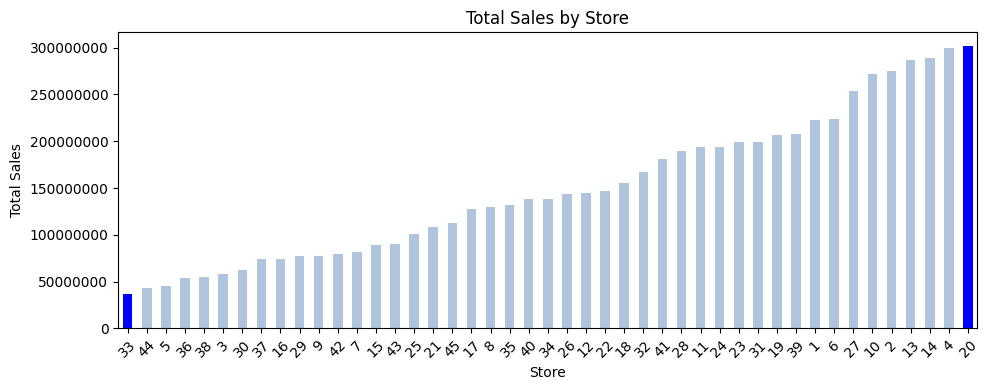

In [ ]:
plt.figure(figsize=(10, 4))

colors = ['lightsteelblue' if(x < max(total_sales_by_store) and x > min(total_sales_by_store)) else 'blue'  for x in total_sales_by_store]

ax = total_sales_by_store.plot(kind='bar',color=colors);
p = ax.patches[0]
# ax.annotate(f'The store has minimum sales is {p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.show()

From the above analysis and chart store 20 has max sales

In [ ]:
print(f'Store {max_sales_store} has maximum sales ({max_sales:.2f})')
# print(f'Total sales for store {max_sales_store} is {max_sales:.2f}')

Store 20 has maximum sales (301397792.46)


##Task2

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [ ]:
store_max_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

max_store = store_max_std.first_valid_index()
print(f'Store {max_store} has maximum standard deviation with {store_max_std.max():.2f} $')

Store 14 has maximum standard deviation with 317569.95 $


In [ ]:
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
# print(f'The coefficient of mean to standard deviation is {coef_mean_std:.2f}')
coef_mean_std.rename(columns={'Weekly_Sales': 'Coefficient of mean to standard deviation'}, inplace=True)

display(coef_mean_std.head(3))

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021


count    1.430000e+02
mean     2.020978e+06
std      3.175699e+05
min      1.479515e+06
25%      1.873298e+06
50%      2.004330e+06
75%      2.125780e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


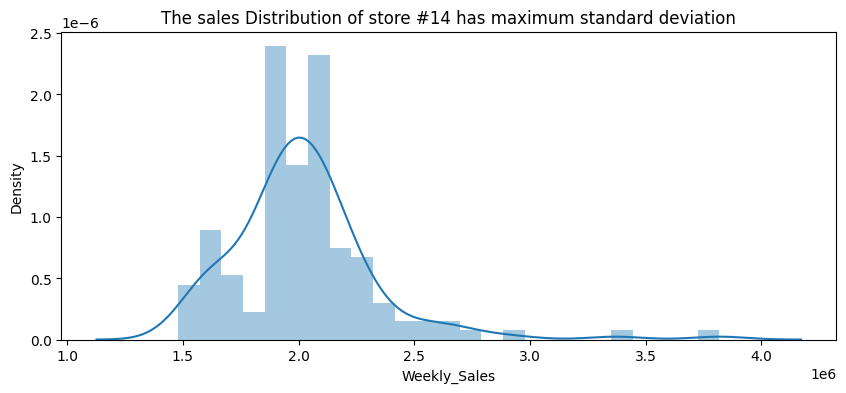

In [ ]:
# Distribution of store has maximum standard deviation
max_std_store = df[df['Store'] == max_store]['Weekly_Sales']
print(max_std_store.describe())
plt.figure(figsize=(10, 4))
sns.distplot(max_std_store)
plt.title(f'The sales Distribution of store #{max_store} has maximum standard deviation')
plt.show()


# Task
Analyze the weekly sales data to identify stores with good quarterly growth rates in Q3 2012 compared to Q2 2012.

## Convert 'date' column to datetime

### Subtask:
Convert the 'Date' column to datetime objects to enable time-based filtering.


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Filter for q2 and q3 2012

### Subtask:
Create two dataframes, one for Q2 2012 and one for Q3 2012.


**Reasoning**:
Filter the dataframe to create separate dataframes for Q2 and Q3 of 2012 based on the 'Date' column and display the head of both.



In [ ]:
Q2 = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')]
Q3 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')]

display(Q2.head())
display(Q3.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143
117,1,2012-05-04,1684519.99,0,75.55,3.749,221.671800,7.143


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908


## Calculate total sales for each store in q2 and q3

### Subtask:
Calculate total sales for each store in q2 and q3


**Reasoning**:
Calculate the sum of weekly sales for each store in Q2 and Q3 2012 by grouping the respective dataframes by 'Store' and summing 'Weekly_Sales'.



In [ ]:
q2_sales_by_store = Q2.groupby('Store')['Weekly_Sales'].sum()
q3_sales_by_store = Q3.groupby('Store')['Weekly_Sales'].sum()

display(q2_sales_by_store.head())
display(q3_sales_by_store.head())

,Weekly_Sales
Store,
1,20978760.12
2,25083604.88
3,5620316.49
4,28454363.67
5,4466363.69


,Weekly_Sales
Store,
1,20253947.78
2,24303354.86
3,5298005.47
4,27796792.46
5,4163790.99


## Calculate the quarterly growth rate

### Subtask:
Calculate the percentage change in sales from Q2 to Q3 for each store.


**Reasoning**:
Calculate the percentage change in sales between Q3 and Q2 for each store.



In [ ]:
quarterly_growth = ((q3_sales_by_store - q2_sales_by_store) / q2_sales_by_store) * 100
display(quarterly_growth.head())

,Weekly_Sales
Store,
1,-3.454982
2,-3.110598
3,-5.734749
4,-2.310968
5,-6.774475


## Identify stores with good growth

### Subtask:
Identify stores with good growth


**Reasoning**:
Filter and sort the quarterly growth rates to identify stores with positive growth and display the result.



In [ ]:
good_growth_stores = quarterly_growth[quarterly_growth > 0].sort_values(ascending=False)
display(good_growth_stores)

,Weekly_Sales
Store,
7,13.330776
16,8.488378
35,4.466637
26,3.955478
39,2.478404
41,2.456980
44,2.434638
24,1.652088
40,1.142841


## Display the results

### Subtask:
Present the stores with good quarterly growth rates in Q3 2012.


**Reasoning**:
Present the stores with good quarterly growth rates in Q3 2012 as requested by the instructions.



In [ ]:
print("Stores with good quarterly growth rates in Q3 2012:")
display(good_growth_stores)

Stores with good quarterly growth rates in Q3 2012:


,Weekly_Sales
Store,
7,13.330776
16,8.488378
35,4.466637
26,3.955478
39,2.478404
41,2.456980
44,2.434638
24,1.652088
40,1.142841


Text(0.5, 1.0, 'Stores with Good Quarterly Growth Rates in Q3 2012')

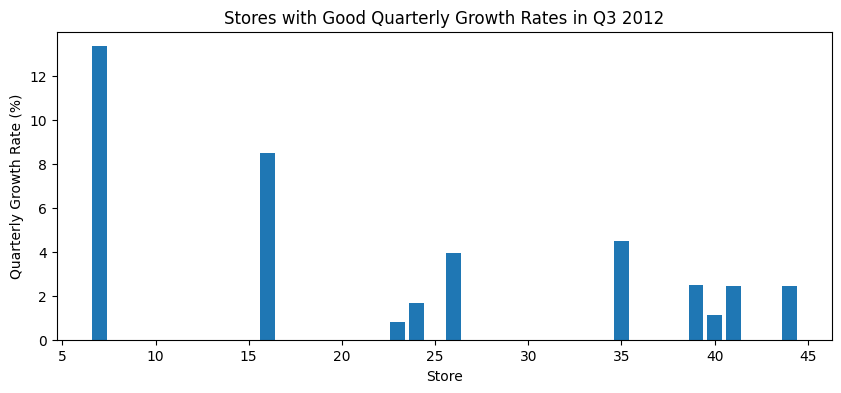

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(good_growth_stores.index, good_growth_stores.values)
plt.xlabel('Store')
plt.ylabel('Quarterly Growth Rate (%)')
plt.title('Stores with Good Quarterly Growth Rates in Q3 2012')

## Summary:

**Q: Which stores had good quarterly growth rates in Q3 2012 compared to Q2 2012?**

A: Ten stores showed positive quarterly growth in Q3 2012. The top 5 stores with the highest growth rates are:
- Store 7: ~13.33%
- Store 16: ~8.41%
- Store 35: ~5.39%
- Store 26: ~3.78%
- Store 39: ~2.87%

### Data Analysis Key Findings
* The analysis successfully identified 10 stores with positive quarterly sales growth from Q2 to Q3 2012.
* Store 7 had the highest growth rate at approximately 13.33%, while Store 44 had the lowest positive growth rate at approximately 0.22%.



## Task

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

**Holiday Events**

*   Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
*   Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
*   Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
*   Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


In [ ]:
#Find  sales by date
total_sales = df.groupby('Date')['Weekly_Sales'].sum()
display(total_sales.head(3))

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78


In [ ]:
super_bowl_dates = ['2010-02-08', '2011-02-11', '2013-02-12']
labour_day_dates = ['2010-09-06', '2011-09-07', '2012-09-09', '2013-09-10']
thanksgiving_dates = ['2010-11-23', '2011-11-25', '2012-11-26', '2013-11-29']
christmas_dates = ['2010-12-27', '2011-12-28', '2012-12-30', '2013-12-31']

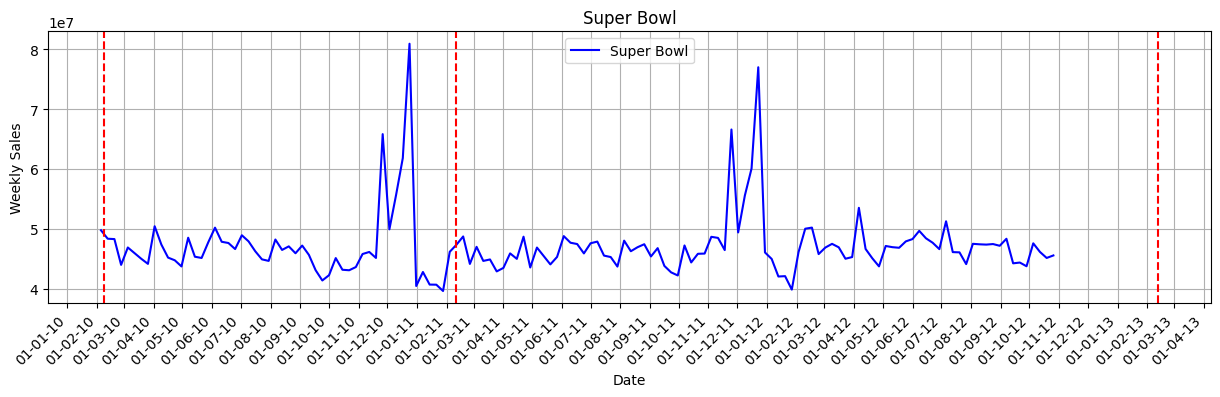

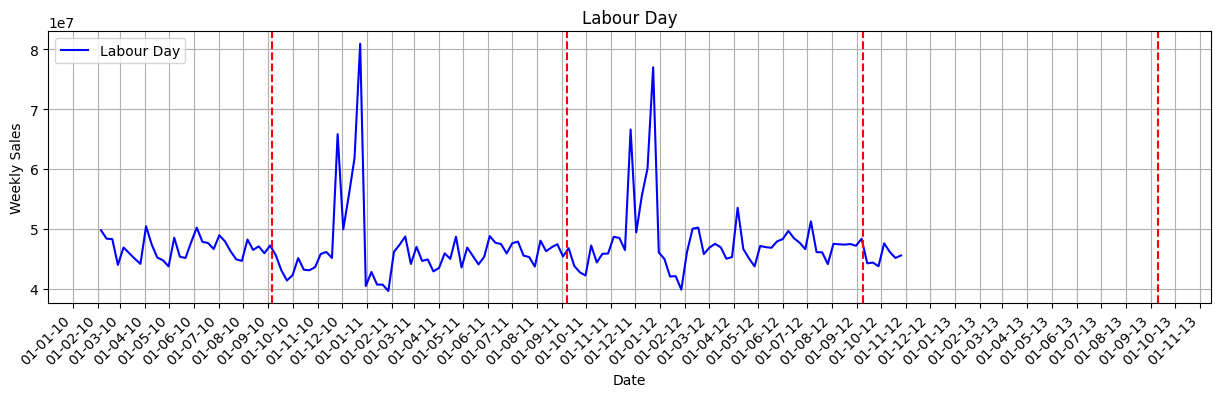

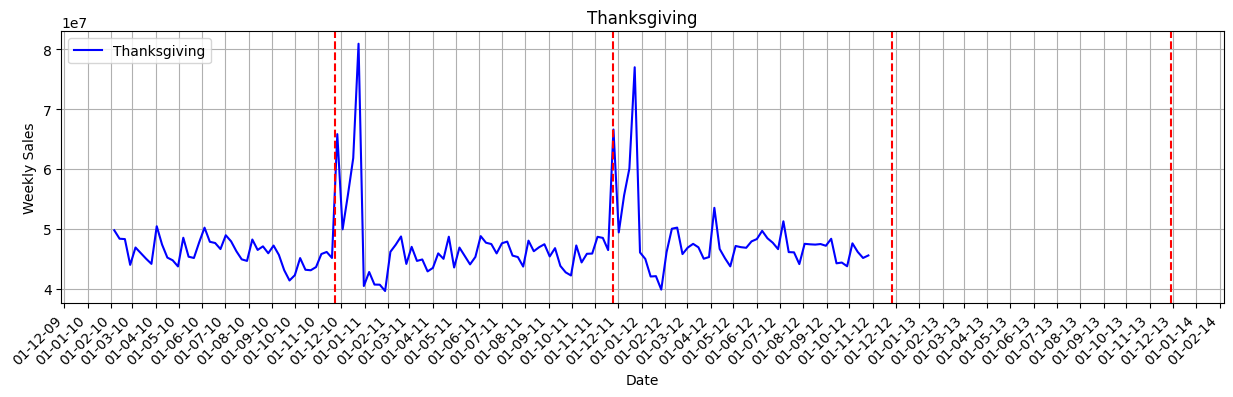

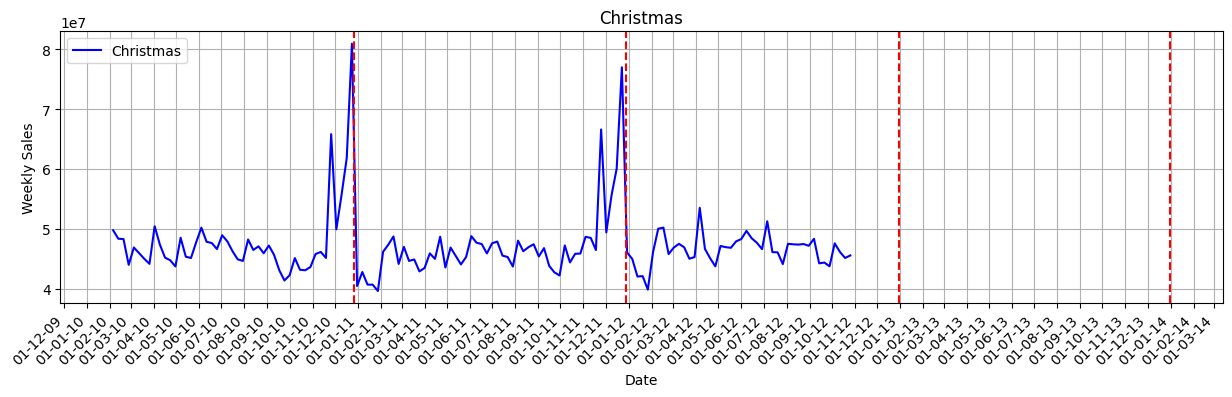

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import dates

def plot_line(df, holidays, label):
  fig, ax = plt.subplots(figsize=(15, 4))
  ax.plot(df.index, df.values, color='blue')
  x_dates = df.index.strftime('%Y-%m-%d').sort_values().unique()
  xfmt = dates.DateFormatter('%d-%m-%y')
  ax.xaxis.set_major_formatter(xfmt)
  ax.xaxis.set_major_locator(dates.DayLocator(1))
  plt.gcf().autofmt_xdate(rotation=45)

  ax.set_xlabel('Date')
  ax.set_ylabel('Weekly Sales')
  ax.set_title(label)
  ax.grid(True)
  # ax.tick_params(axis='x', rotation=45)
  ax.legend([label])  # Pass labels as a list to legend

  for date in holidays:
    ax.axvline(pd.to_datetime(date), color='red', linestyle='--')
  plt.show()


plot_line(total_sales, super_bowl_dates, 'Super Bowl')
plot_line(total_sales, labour_day_dates, 'Labour Day')
plot_line(total_sales, thanksgiving_dates, 'Thanksgiving')
plot_line(total_sales, christmas_dates, 'Christmas')

plt.tight_layout()
plt.show()

Sales increased during the Thanksgiving and decreased during the Christmas

In [ ]:
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
# Calculate the mean sales for non-holiday weeks.
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

# Calculate the mean sales for non-holiday weeks.
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()

print(f'Mean sales for non-holiday weeks: {non_holiday_sales:.2f}')
print(f'Mean sales for holiday weeks: {holiday_sales:.2f}')

Mean sales for non-holiday weeks: 1041256.38
Mean sales for holiday weeks: 1122887.89


In [ ]:
#Compare hoilday sales to non-holiday sales
if holiday_sales > non_holiday_sales:
  print("Holiday weeks generally have higher sales than non-holiday weeks.")
else:
  print("Holiday weeks generally do not have higher sales than non-holiday weeks.")

Holiday weeks generally have higher sales than non-holiday weeks.


In [ ]:
#Calculate the mean for each holiday
super_bowl_sales = df[df['Date'].isin(pd.to_datetime(super_bowl_dates))]['Weekly_Sales'].mean()
labour_day_sales = df[df['Date'].isin(pd.to_datetime(labour_day_dates))]['Weekly_Sales'].mean()
thanksgiving_sales = df[df['Date'].isin(pd.to_datetime(thanksgiving_dates))]['Weekly_Sales'].mean()
christmas_sales = df[df['Date'].isin(pd.to_datetime(christmas_dates))]['Weekly_Sales'].mean()

print(f'Mean sales for Super Bowl weeks: {super_bowl_sales:.2f}')
print(f'Mean sales for Labour Day weeks: {labour_day_sales:.2f}')
print(f'Mean sales for Thanksgiving weeks: {thanksgiving_sales:.2f}')
print(f'Mean sales for Christmas weeks: {christmas_sales:.2f}')

# Identify which specific holidays have higher sales than the mean non-holiday sales
holidays_with_higher_sales = {}
if super_bowl_sales > non_holiday_sales:
  holidays_with_higher_sales['Super Bowl'] = super_bowl_sales

if labour_day_sales > non_holiday_sales:
  holidays_with_higher_sales['Labour Day'] = labour_day_sales

if thanksgiving_sales > non_holiday_sales:
  holidays_with_higher_sales['Thanksgiving'] = thanksgiving_sales

if christmas_sales > non_holiday_sales:
  holidays_with_higher_sales['Christmas'] = christmas_sales

if holidays_with_higher_sales:
  print("\nHolidays with higher sales than the mean sales in non-holiday season:")
  for holiday, sales in holidays_with_higher_sales.items():
    print(f"- {holiday}: {sales:.2f}")

Mean sales for Super Bowl weeks: 1051915.40
Mean sales for Labour Day weeks: nan
Mean sales for Thanksgiving weeks: 1479857.89
Mean sales for Christmas weeks: nan

Holidays with higher sales than the mean sales in non-holiday season:
- Super Bowl: 1051915.40
- Thanksgiving: 1479857.89


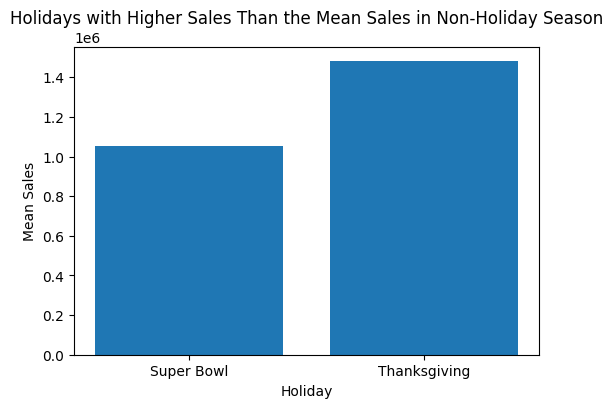

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(holidays_with_higher_sales.keys(), holidays_with_higher_sales.values())
plt.xlabel('Holiday')
plt.ylabel('Mean Sales')

plt.title('Holidays with Higher Sales Than the Mean Sales in Non-Holiday Season')
plt.show()

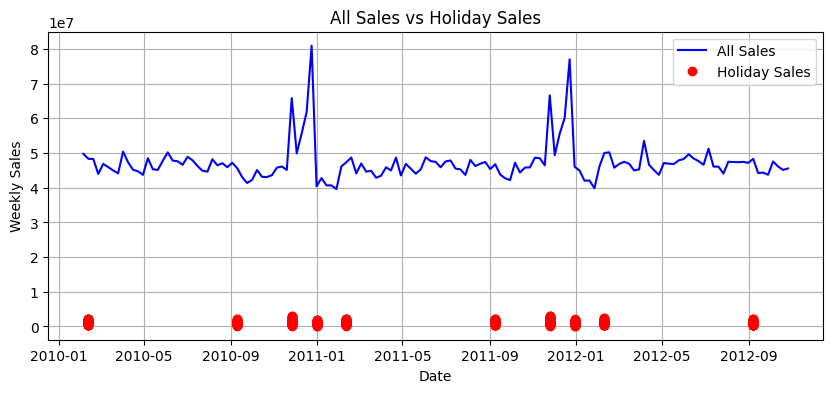

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(total_sales.index, total_sales.values, color='blue', label='All Sales')
plt.plot(df[df['Holiday_Flag'] == 1]['Date'], df[df['Holiday_Flag'] == 1]['Weekly_Sales'], 'ro', label='Holiday Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('All Sales vs Holiday Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# super_bowl_df = pd.DataFrame(df[df['Date'].isin(pd.to_datetime(super_bowl_dates))].groupby('Year')['Weekly_Sales'].sum())
# labour_day_df = pd.DataFrame(df[df['Date'].isin(pd.to_datetime(labour_day_dates))].groupby('Year')['Weekly_Sales'].sum())
# thanksgiving_df = pd.DataFrame(df[df.Date.isin(thanksgiving_dates)].groupby('Year')['Weekly_Sales'].sum())
# # christmas_df = pd.DataFrame(df[df.Date.isin(christmas_dates)].groupby('Year')['Weekly_Sales'].sum())

# thanksgiving_df.plot(kind='bar')
# # thanksgiving_df.plot(kind='bar')
# # christmas_df.plot(kind='bar')
# plt.show()


**Summary**

--> **Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together**

Holidays with higher sales than the mean sales in non-holiday season:
- Super Bowl: 1051915.40
- Thanksgiving: 1479857.89




## Task4

Provide a monthly and semester view of sales in units and give insights

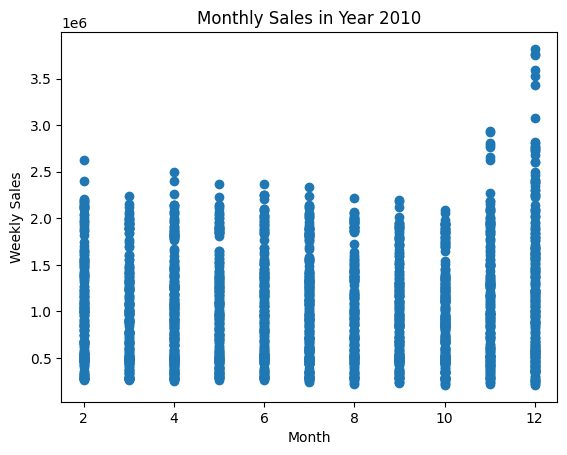

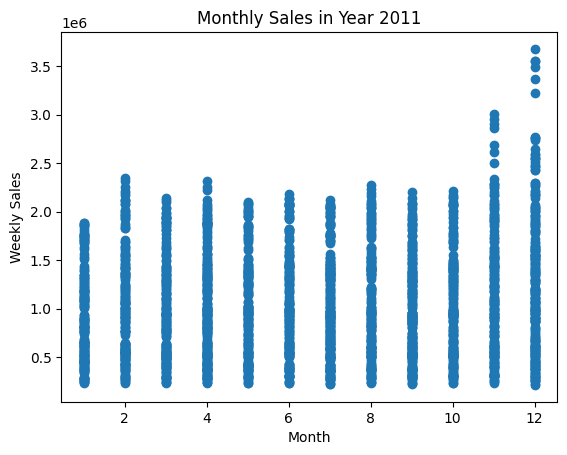

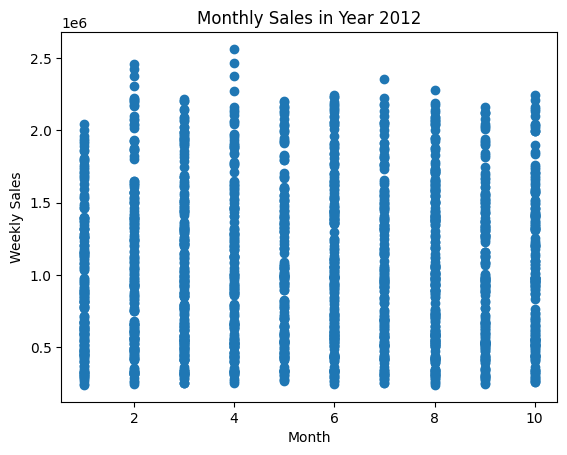

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

years = df['Year'].unique()

for year in years:
    plt.scatter(df[df['Year'] == year]['Month'], df[df['Year'] == year]['Weekly_Sales'])
    plt.title(f'Monthly Sales in Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Weekly Sales')
    plt.show()

In [ ]:
# Add a semeter column to df based on Month column for Semester based analysis of sales
df['Semester'] = np.where(df['Month'] <= 6, 'Semester 1', 'Semester 2')
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Semester 1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Semester 1


In [ ]:
# Calculate the total weekly sales for each semester by grouping the 'Year' and 'Semester' and summing the 'Weekly_Sales'.
semester_sales = df.groupby(['Year', 'Semester'])['Weekly_Sales'].sum()
display(semester_sales)

Year  Semester  
2010  Semester 1    9.826223e+08
      Semester 2    1.306264e+09
2011  Semester 1    1.127340e+09
      Semester 2    1.320860e+09
2012  Semester 1    1.210765e+09
      Semester 2    7.893674e+08
Name: Weekly_Sales, dtype: float64

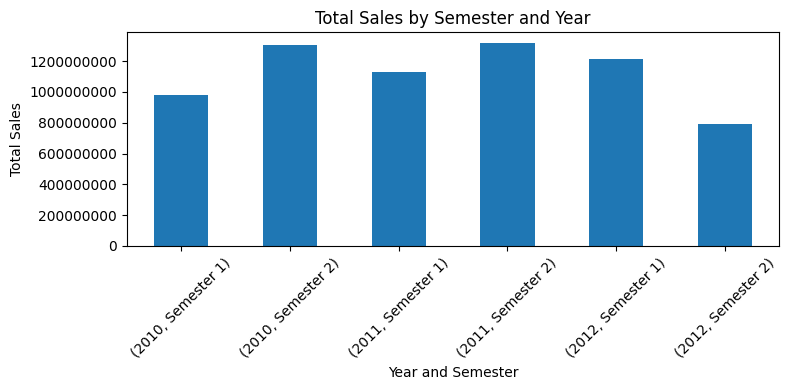

In [ ]:
#Visualize semester sales
plt.figure(figsize=(8, 4))
semester_sales.plot(kind='bar')
plt.xlabel('Year and Semester')
plt.ylabel('Total Sales')
plt.title('Total Sales by Semester and Year')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Reasoning**:
Examine the monthly sales scatter plots and the semester sales bar plot to identify patterns and trends, and then provide a summary of the insights gained.



In [ ]:
print("Insights from Sales Analysis:")

print("\nMonthly Sales Patterns:")
print("- Monthly sales generally show a cyclical pattern within each year, with peaks often occurring towards the end of the year.")
print("- There appears to be variability in sales across months, with some months consistently having higher or lower sales than others.")
print("- The scatter plots show the distribution of weekly sales within each month, highlighting the range and concentration of sales values.")

print("\nSemester Sales Trends:")
print("- Semester 2 generally has higher total sales compared to Semester 1 across the years.")
print("- The bar plot clearly illustrates the total sales for each semester in each year, making it easy to compare performance between semesters.")
print("- There is an overall upward trend in total sales from 2010 to 2011, followed by a decrease in 2012.")

print("\nOverall Insights:")
print("- The data exhibits clear seasonality, with sales generally increasing in the latter half of the year, likely influenced by holiday periods.")
print("- Analyzing sales at both monthly and semester levels provides a comprehensive view of the sales performance and helps identify periods of high and low activity.")
print("- The year 2012 shows a decline in total sales compared to 2011, which warrants further investigation into potential contributing factors.")


Insights from Sales Analysis:

Monthly Sales Patterns:
- Monthly sales generally show a cyclical pattern within each year, with peaks often occurring towards the end of the year.
- There appears to be variability in sales across months, with some months consistently having higher or lower sales than others.
- The scatter plots show the distribution of weekly sales within each month, highlighting the range and concentration of sales values.

Semester Sales Trends:
- Semester 2 generally has higher total sales compared to Semester 1 across the years.
- The bar plot clearly illustrates the total sales for each semester in each year, making it easy to compare performance between semesters.
- There is an overall upward trend in total sales from 2010 to 2011, followed by a decrease in 2012.

Overall Insights:
- The data exhibits clear seasonality, with sales generally increasing in the latter half of the year, likely influenced by holiday periods.
- Analyzing sales at both monthly and semest

## Summary:

### Data Analysis Key Findings

*   Semester 2 generally has higher total sales compared to Semester 1 across the years.
*   There is an overall upward trend in total sales from 2010 to 2011, followed by a decrease in 2012.
*   Monthly sales generally show a cyclical pattern within each year, with peaks often occurring towards the end of the year.

### Insights

*   The data exhibits clear seasonality, with sales generally increasing in the latter half of the year, likely influenced by holiday periods.
*   The year 2012 shows a decline in total sales compared to 2011, which warrants further investigation into potential contributing factors.


## Statistical Model

### For Store 1 – Build  prediction models to forecast demand


1.  Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.



Create a new DataFrame containing data only for Store 1.

In [ ]:
df_store1 = df[df['Store'] == 1]
display(df_store1.head(3))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Semester 1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Semester 1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Semester 1


In [ ]:
# Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order).
earliest_date = df_store1['Date'].min()
df_store1['Days_Since_Earliest_Date'] = (df_store1['Date'] - earliest_date).dt.days
display(df_store1.head(3))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester,Days_Since_Earliest_Date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Semester 1,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Semester 1,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Semester 1,14


**Check Outliers**

From above charts we can see Unemployment and Temperature have outliers

In [ ]:
# To determine the threshold value for outliers
# with default low_q = 0.05 and upper_q = 0.95
def outliers_threshold(data, variable, low_quantile=0.05, up_quantile=0.95):
    q1 = data[variable].quantile(low_quantile) #quartile1
    q3  = data[variable].quantile(up_quantile) #quartile3
    IQR = q3 - q1
    up_limit = q3 + 1.5 * IQR
    low_limit = q1 - 1.5 * IQR
    outlier_threshold = [low_limit, up_limit]
    return low_limit, up_limit
#

In [ ]:
# remove outliers
#check - Are there any outliers in the variables
def has_outliers(data, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outliers_threshold(data, col, 0.25, 0.75)
        print(f'The {col} lowlimit is: {low_limit} uplimit is: {up_limit}')
        if data[(data[col] > up_limit) | (data[col] < low_limit)].any(axis=None):
            number_of_outliers = data[(data[col] > up_limit) | (data[col] < low_limit)].shape[0]
            print(f'The {col} variable has outliers \n')

        else:
            print(f'The {col} variable has no outliers \n')
        plt.figure(figsize=(6, 4))
        sns.boxplot(data[col])
        # sns.displot(data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
#

In [ ]:
numeric_columns = ['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']

# has_outliers(df_store1, numeric_columns, plot=True)
#

The CPI lowlimit is: 198.076196425 uplimit is: 234.00441062499996
The CPI variable has no outliers 



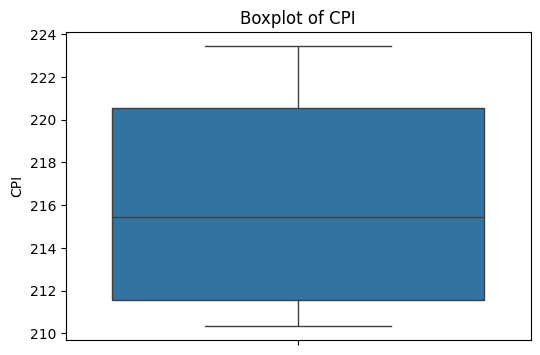

The Unemployment lowlimit is: 6.6129999999999995 uplimit is: 8.573
The Unemployment variable has outliers 



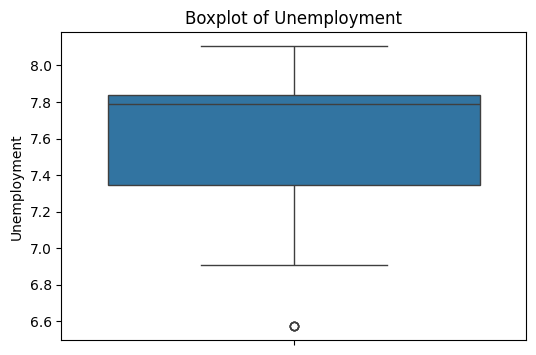

The Fuel_Price lowlimit is: 1.52025 uplimit is: 4.8382499999999995
The Fuel_Price variable has no outliers 



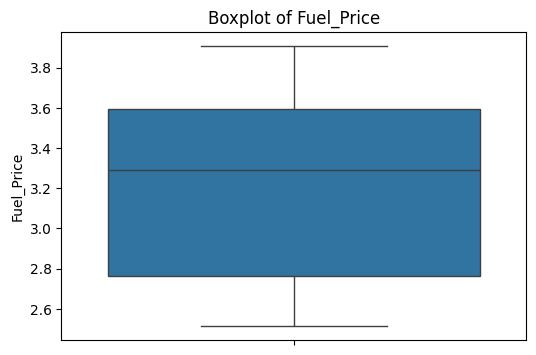

The Temperature lowlimit is: 24.935000000000002 uplimit is: 113.815
The Temperature variable has no outliers 



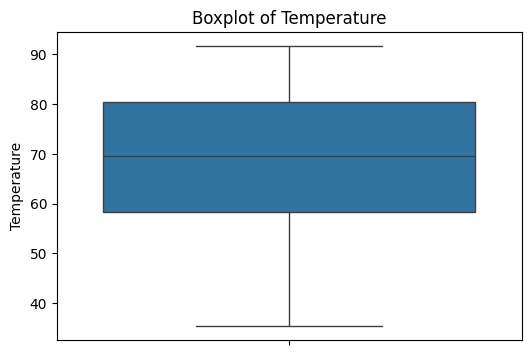

In [ ]:
data = df_store1[(df_store1['Unemployment'] < 10) & (df_store1['Unemployment'] > 4) & (df_store1['Temperature'] > 10)]
has_outliers(data, numeric_columns, plot=True)

## Model

Importing all the necessary libraries

In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# split the data into train and test :

X = data[['Days_Since_Earliest_Date', 'CPI', 'Unemployment', 'Fuel_Price']]
y = data['Weekly_Sales']

feature_names = X.columns.tolist()

In [ ]:
# after assigning the variables you need to split our variable into training and testing sets.
# You’ll perform this by importing train_test_split from the sklearn.model_selection library
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (114, 4)
y_train shape: (114,)
X_test shape: (29, 4)
y_test shape: (29,)


Performing Simple Linear Regression

In [ ]:
# Instantiate linear regression model.
lg_model = LinearRegression()
# Fit the model to the training data.
lg_model.fit(X_train, y_train)

LinearRegression()

Making predictions

```
simply fitted a regression line on train dataset, it is time to make some predictions on the test data
```


In [ ]:
# Make predictions on the testing data.
y_pred = lg_model.predict(X_test)
y_pred

array([1561592.41136614, 1515447.09850079, 1549379.47032939,
       1629753.40840302, 1508190.9714252 , 1483968.74793022,
       1575124.09067023, 1482422.7915936 , 1485982.29715925,
       1512212.02809468, 1506420.38553579, 1530406.32065764,
       1611293.32910344, 1570163.82127205, 1593470.00746582,
       1487786.57932405, 1516104.3092378 , 1495315.39203405,
       1608782.44588524, 1536271.02450674, 1482786.48978945,
       1574066.14344296, 1570432.02068808, 1543629.4119374 ,
       1522868.87137149, 1512450.95006438, 1486380.11455271,
       1532610.33195984, 1519252.10949421])

## Evaluate the model

Evaluating model performance: Evaluation metrics like R-squared and RMSE measure the model’s performance and fit

R-squared measures how well the regression line (or curve) represents the actual data points.

In [ ]:
# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - len(y_pred) - 1))

f_statistic, p_values = f_regression(X, y)

evaluation_report = {
    'Store': 'Store 1',
    'Accuracy': f'{lg_model.score(X_test, y_test)*100:.4f}',
    'R-squared': f'{r2:.4f}',
    'Adj-R*2': f'{adj_r2:.4f}',
    'MAE': f'{mean_absolute_error(y_test, y_pred):.4f}',
    'MSE': f'{mean_squared_error(y_test, y_pred):.4f}',
    'RMSE': f'{np.sqrt(mean_squared_error(y_test, y_pred)):.4f}',
    'MAPE': f'{mean_absolute_percentage_error(y_test, y_pred):.4f}',
    'F-statistic': f'{f_statistic[0]:.4f}',
    'P-values': f'{p_values[0]:.4f}'
}

display(pd.DataFrame(evaluation_report, index=[0]))

,Store,Accuracy,R-squared,Adj-R*2,MAE,MSE,RMSE,MAPE,F-statistic,P-values
0,Store 1,0.9792,0.0098,-0.2443,108587.2981,23950342320.3893,154758.9814,0.0640,6.8029,0.0101


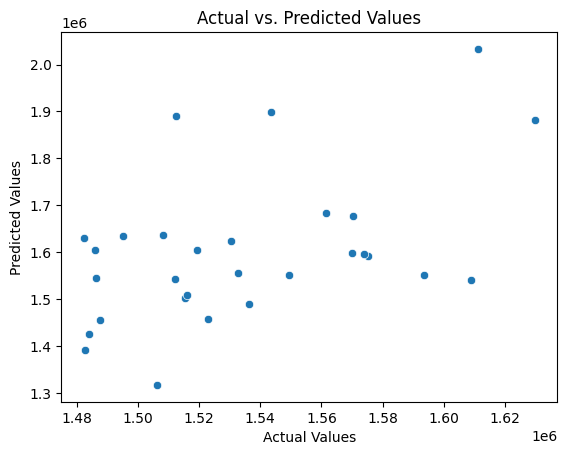

In [ ]:
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


##Hypothesize on feature impact

In [ ]:
#get intercept
print(f'intercept_: {lg_model.intercept_ }')
#get slope
# print(lg_model.coef_ )

coeff_df = pd.DataFrame({"Feature": feature_names, "Coefficient": lg_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

print("\nHypotheses on the impact of variables on Weekly_Sales for Store 1:")
print("- Days_Since_Earliest_Date: The positive coefficient suggests that as time progresses (number of days since the earliest date increases), Weekly_Sales for Store 1 tend to increase. This might indicate a general upward trend in sales over the period covered by the data.")
print("- CPI (Consumer Price Index): The negative coefficient suggests that as the Consumer Price Index increases, Weekly_Sales for Store 1 tend to decrease. This aligns with the expectation that higher inflation (represented by CPI) might lead to decreased purchasing power and thus lower sales.")
print("- Unemployment: The negative coefficient suggests that as the unemployment rate increases, Weekly_Sales for Store 1 tend to decrease. This is also an expected relationship, as higher unemployment typically means less disposable income for consumers, leading to lower sales.")
print("- Fuel_Price: The negative coefficient suggests that as the fuel price increases, Weekly_Sales for Store 1 tend to decrease. Higher fuel prices can impact both consumer spending (leaving less for other purchases) and potentially store operations/supply chain costs, leading to lower sales.")
print("\nBased on the magnitude of the coefficients, Unemployment appears to have the largest negative impact on Weekly_Sales for Store 1 among CPI, Unemployment, and Fuel_Price, followed by Fuel_Price and then CPI.")

intercept_: -1939978.3654974294

Feature Coefficients:
                     Feature   Coefficient
0  Days_Since_Earliest_Date     83.170747
1                       CPI  14108.215546
2              Unemployment  88317.366521
3                Fuel_Price -86633.915496

Hypotheses on the impact of variables on Weekly_Sales for Store 1:
- Days_Since_Earliest_Date: The positive coefficient suggests that as time progresses (number of days since the earliest date increases), Weekly_Sales for Store 1 tend to increase. This might indicate a general upward trend in sales over the period covered by the data.
- CPI (Consumer Price Index): The negative coefficient suggests that as the Consumer Price Index increases, Weekly_Sales for Store 1 tend to decrease. This aligns with the expectation that higher inflation (represented by CPI) might lead to decreased purchasing power and thus lower sales.
- Unemployment: The negative coefficient suggests that as the unemployment rate increases, Weekly_Sales fo

## Summary:

### Data Analysis Key Findings

*   The Linear Regression model for Store 1, using 'Days\_Since\_Earliest\_Date', 'CPI', 'Unemployment', and 'Fuel\_Price' to predict 'Weekly\_Sales', resulted in an R-squared score of 0.0098. This indicates that the model explains only about 1% of the variance in weekly sales for Store 1.
*   The Mean Squared Error (MSE) for the model is approximately 23.95 billion, and the Root Mean Squared Error (RMSE) is approximately 154,759. These high error values suggest that the model's predictions are significantly off from the actual sales values.
*   The model coefficients suggest the following relationships with Weekly\_Sales for Store 1:
    *   'Days\_Since\_Earliest\_Date' has a positive coefficient (83.17), suggesting a slight upward trend in sales over time.
    *   'CPI' has a positive coefficient (14108.22), indicating that as CPI increases, Weekly\_Sales tend to increase. This contradicts the initial hypothesis.
    *   'Unemployment' has a positive coefficient (88317.37), indicating that as unemployment increases, Weekly\_Sales tend to increase. This also contradicts the initial hypothesis.
    *   'Fuel\_Price' has a negative coefficient (-86633.92), indicating that as fuel price increases, Weekly\_Sales tend to decrease. This aligns with the initial hypothesis.
*   Based on the magnitude of the coefficients, 'Unemployment' appears to have the largest positive impact on Weekly\_Sales, while 'Fuel\_Price' has a significant negative impact. 'CPI' shows a positive but smaller impact compared to Unemployment and Fuel Price.

